## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Read the mouse data and the study results
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Read the mouse data and the study results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset,Display the dataTable for preview
combo_data = pd.merge(mouse_metadata, study_results, how='inner')
combo_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice=combo_data["Mouse ID"].value_counts()
nmbr_mice=len(mice)
nmbr_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combo_data.loc[combo_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combo_data[combo_data['Mouse ID'].isin(duplicate_mice)==False]

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
reg_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
reg_mean


reg_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
reg_median


reg_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
reg_variance


reg_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
reg_std

reg_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
reg_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
single_groupBy = clean_df.groupby('Drug Regimen')
summ_stats_table_2 = single_groupBy.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summ_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

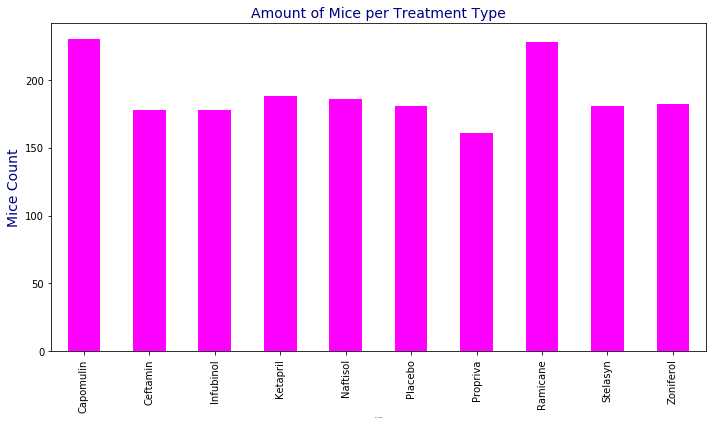

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_mice_perTx = combo_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = count_mice_perTx.plot.bar(figsize=(10,6), color='magenta',fontsize = 10)
count_mice_perTx
plt.xlabel("Drug Regimen",fontsize = 1)
plt.ylabel("Mice Count",color= "navy", fontsize = 14)
plt.title("Amount of Mice per Treatment Type",color="navy",fontsize = 14)

plt.tight_layout()
plt.show()

count_mice_perTx

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_list =(combo_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Amount of Mice')

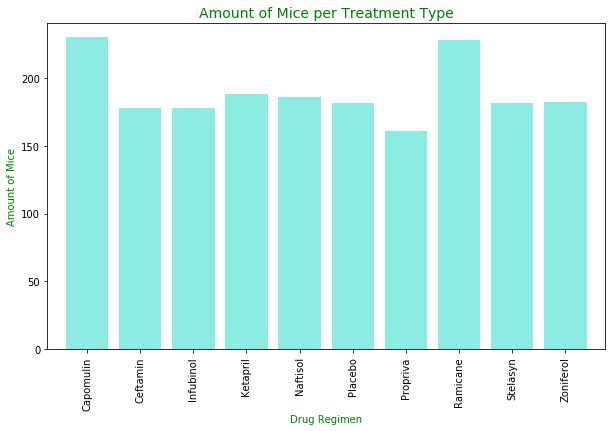

In [14]:
x_axis = np.arange(len(count_mice_perTx))
figure = plt.subplots(figsize=(10, 6))
plt.bar(x_axis, mice_list, color='turquoise', alpha=0.6, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Amount of Mice per Treatment Type", color= "green", fontsize = 14)
plt.xlabel("Drug Regimen", color="green",fontsize = 10)
plt.ylabel("Amount of Mice",color="green",fontsize = 10)

In [15]:
#  Group by gender and get the number to plot
groupby_gender = combo_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


<function matplotlib.pyplot.show(*args, **kw)>

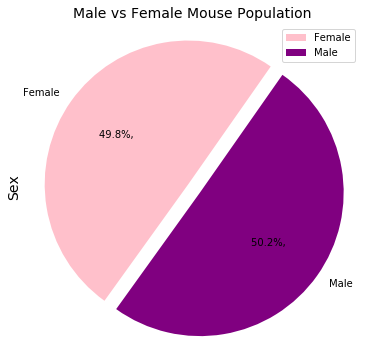

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'purple']
explode = (0.1, 0)
plt_pie = mouse_gender.plot.pie(y='Total Count',figsize=(6,6),startangle=55, colors = colors,  explode = explode, autopct="%1.1f%%, ")

plt.title('Male vs Female Mouse Population',fontsize = (14))
plt.axis("equal",fontsize = 14)
plt.ylabel('Sex', fontsize = 14)
plt.show

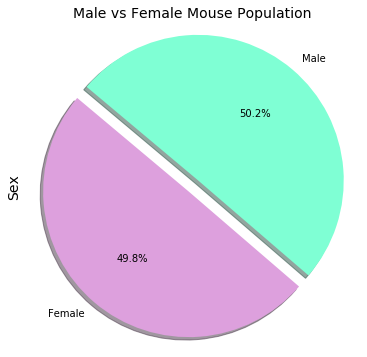

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['plum','aquamarine']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
figure = plt.subplots(figsize=(6, 6))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 14)
plt.ylabel('Sex',fontsize = 14)
#Set equal axis
plt.axis("equal",fontsize = 12)

plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = combo_data.loc[combo_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combo_data.loc[combo_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combo_data.loc[combo_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combo_data.loc[combo_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, combo_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge(Ramicane_vol, combo_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combo_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

# Put treatments into a list for for loop (and later for plot labels)
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [21]:
#Ramicane
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(Ramicane_vol, combo_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combo_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Infubinol_merge.to_csv("output.csv")

# Put treatments into a list for for loop (and later for plot labels)
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:
#Ceftamin
Ceftamin_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Infubinol_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(Ceftamin_vol, combo_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Infubinol_last)
Ceftamin_merge = pd.merge(Infubinol_vol, combo_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
Ceftamin_merge.to_csv("output.csv")

# Put treatments into a list for for loop (and later for plot labels)
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of Ceftamin tumors: 54.04860769
The upper quartile of Ceftamin tumors: 65.52574285
The interquartile range of Ceftamin tumors: 11.477135160000003
The median of Ceftamin tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [23]:
 # Locate the rows which contain mice on each drug and get the tumor volumes
Mice_Tumors_Vol = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

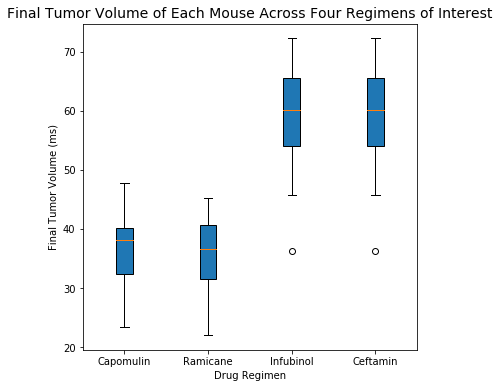

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Mice_Tumors_Vol = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

figure, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest',  fontsize = 14)
ax1.set_ylabel('Final Tumor Volume (ms)', fontsize = 10)
ax1.set_xlabel('Drug Regimen', fontsize = 10)
ax1.boxplot(Mice_Tumors_Vol, labels=Regimen, widths = 0.2, vert=True, patch_artist=True)
#"patch_artist=True" found at-https://matplotlib.org/gallery/statistics/boxplot_color.htm

plt.show()            

## Line and Scatter Plots

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plotLine_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
plotLine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1


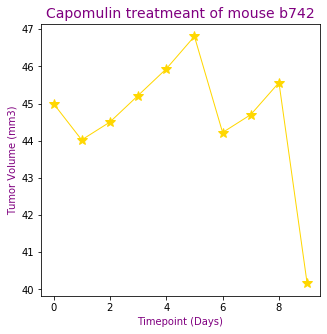

In [26]:
tumsiz = plotLine_df["Tumor Volume (mm3)"]

figure = plt.subplots(figsize=(5,5))
plt.title('Capomulin treatmeant of mouse b742',color="purple", fontsize =14)
plt.plot(x_axis, tumsiz,linewidth=1, markersize=10, marker="*",color="gold", label="Fahreneit")
plt.xlabel('Timepoint (Days)', color="purple",fontsize =10)
plt.ylabel('Tumor Volume (mm3)',color="purple", fontsize =10)
plt.show()

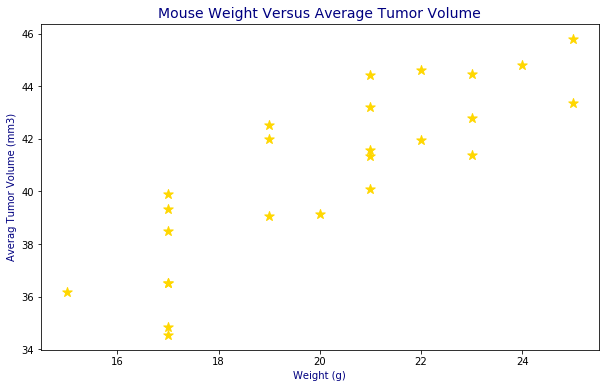

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
figure = plt.subplots(figsize=(10, 6))
avg_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'],s=100, color="gold", marker="*" )
plt.title('Mouse Weight Versus Average Tumor Volume', color= "navy", fontsize =14)
plt.xlabel('Weight (g)',color= "navy",fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)', color= "navy", fontsize =10)

plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between mouse, weight & average tumor volume {corr}")

Correlation between mouse, weight & average tumor volume 0.84


In [34]:
# Calculate the correlation coefficient and linear regression model 
x_values = avg_vol['Weight (g)']
y_values = avg_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


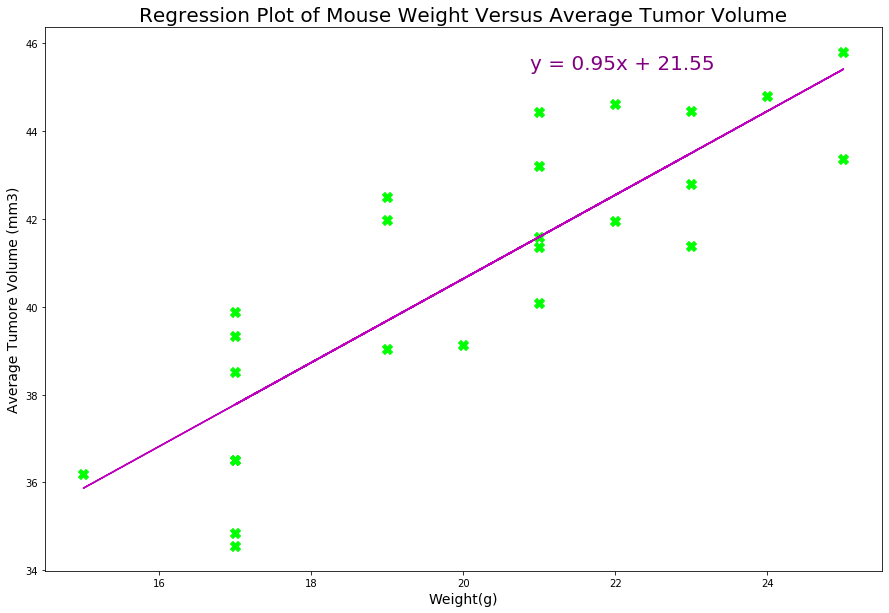

In [52]:
#Add the linear regression equation and line to plot
figure, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=100, color="lime", marker="X" )
plt.plot(x_values,regress_values,"m-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=20,color="purple")

print(f"The r-squared is: {rvalue**2}")

plt.show()